In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
STAD_mutation = pd.read_csv("Team_4_STAD/TCGA.STAD.mutations.txt", sep='\t')

In [3]:
STAD_mutation[['patient_id', 'Chromosome', 'Start_Position', 'Reference_Allele', 'Tumor_Seq_Allele2']]

,patient_id,Chromosome,Start_Position,Reference_Allele,Tumor_Seq_Allele2
0,TCGA-3M-AB46,10,101560185,G,C
1,TCGA-3M-AB46,10,13264119,T,G
2,TCGA-3M-AB46,10,17737155,G,A
3,TCGA-3M-AB46,10,43693490,G,A
4,TCGA-3M-AB46,10,46321916,G,A
...,...,...,...,...,...
234936,TCGA-ZQ-A9CR,8,77763180,G,T
234937,TCGA-ZQ-A9CR,9,32631933,G,A
234938,TCGA-ZQ-A9CR,X,105179181,A,C
234939,TCGA-ZQ-A9CR,X,135496331,G,A


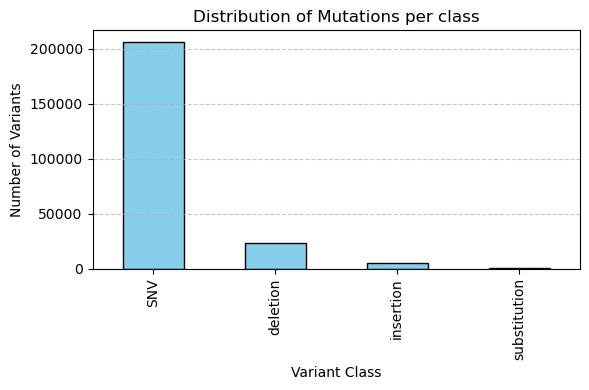

In [4]:
Variant_class = STAD_mutation.groupby("VARIANT_CLASS").count().Center
plt.figure(figsize=(6,4))
Variant_class.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Variant Class', fontsize=10)
plt.ylabel('Number of Variants', fontsize=10)
plt.title('Distribution of Mutations per class', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

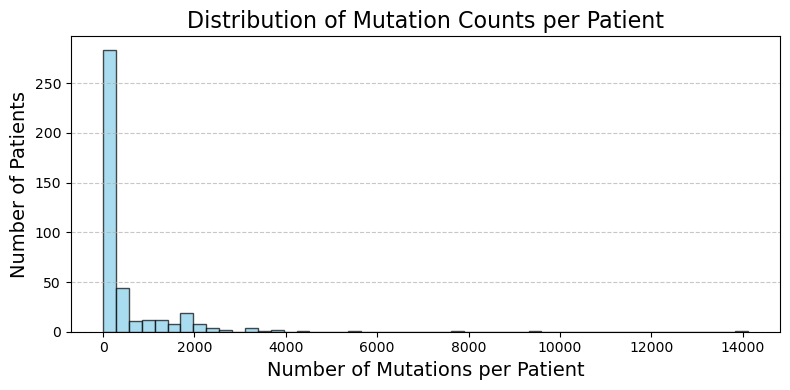

In [5]:
# Check distribution of mutations among patient
mutation_per_patient = STAD_mutation.groupby("patient_id").count().Center
plt.figure(figsize=(8,4))
plt.hist(mutation_per_patient, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Number of Mutations per Patient', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.title('Distribution of Mutation Counts per Patient', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

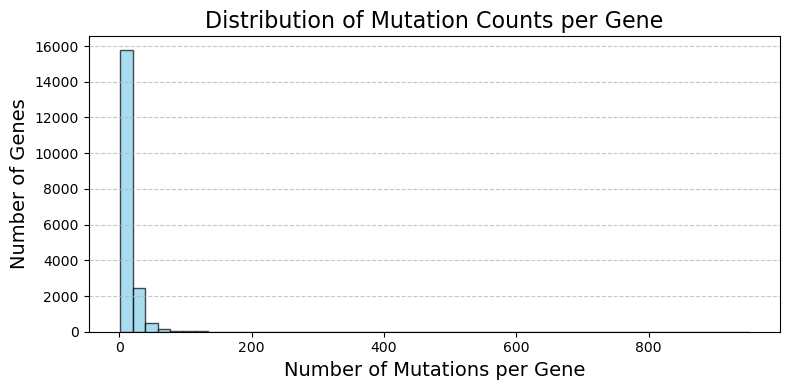

In [6]:
mutation_per_gene = STAD_mutation.groupby("Hugo_Symbol").count().Center
plt.figure(figsize=(8,4))
plt.hist(mutation_per_gene, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Number of Mutations per Gene', fontsize=14)
plt.ylabel('Number of Genes', fontsize=14)
plt.title('Distribution of Mutation Counts per Gene', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
mutation_per_gene[mutation_per_gene > 300]

Hugo_Symbol
MUC16    368
TTN      951
Name: Center, dtype: int64

In [8]:
STAD_mutation[STAD_mutation.COSMIC != "NONE"].COSMIC

9         SITE|p.C124S|c.371G>C|4,CODON|p.0?|c.1_1212del...
43                                CODON|p.Q685*|c.2053C>T|3
73                                BUFFER|p.I88T|c.263T>C|19
83        CODON|p.0?|c.1_1182del1182|6,CODON|p.R283fs*62...
135                               BUFFER|p.A213V|c.638C>T|3
                                ...                        
234849    BUFFER|p.R42C|c.124C>T|5,BUFFER|p.F44F|c.132C>...
234851                            BUFFER|p.F169F|c.507C>T|3
234852    SITE|p.R1007W|c.3019C>T|3,BUFFER|p.R1008W|c.30...
234904    BUFFER|p.S4503G|c.13507A>G|7,BUFFER|p.R4504G|c...
234922                                BUFFER|p.A3V|c.8C>T|3
Name: COSMIC, Length: 13911, dtype: object

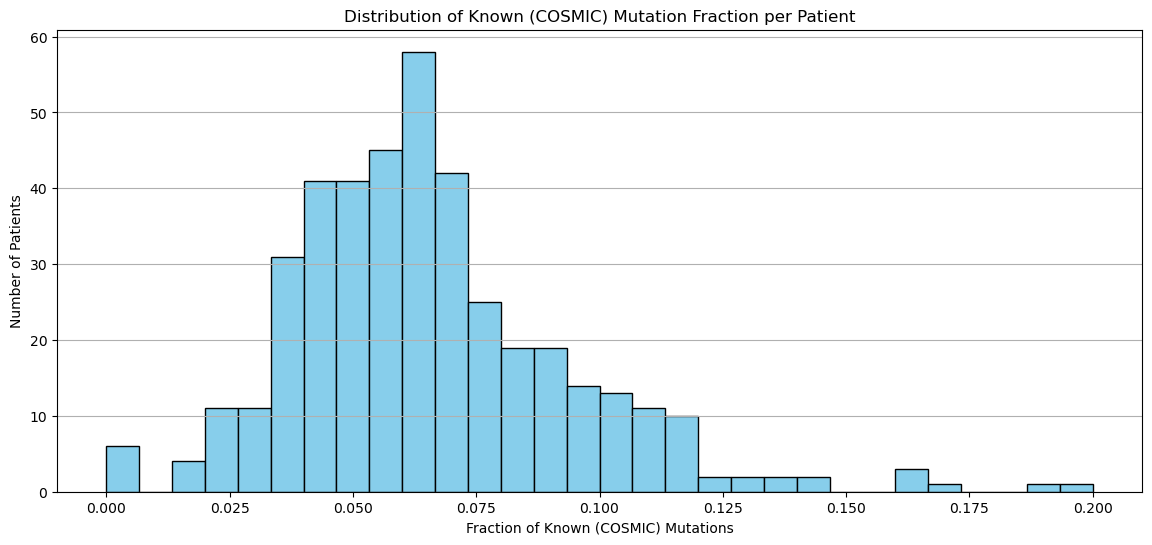

In [9]:
STAD_mutation['COSMIC_status'] = STAD_mutation['COSMIC'].apply(lambda x: 'Known' if x != "NONE" else 'Novel')
mutation_counts = STAD_mutation.groupby('patient_id').COSMIC_status.value_counts().unstack(fill_value=0)
mutation_counts['Total'] = mutation_counts['Known'] + mutation_counts['Novel']
mutation_counts['Fraction_Known'] = mutation_counts['Known'] / mutation_counts['Total']

plt.figure(figsize=(14,6))
mutation_counts['Fraction_Known'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Fraction of Known (COSMIC) Mutations')
plt.ylabel('Number of Patients')
plt.title('Distribution of Known (COSMIC) Mutation Fraction per Patient')
plt.grid(axis='y')
plt.show()

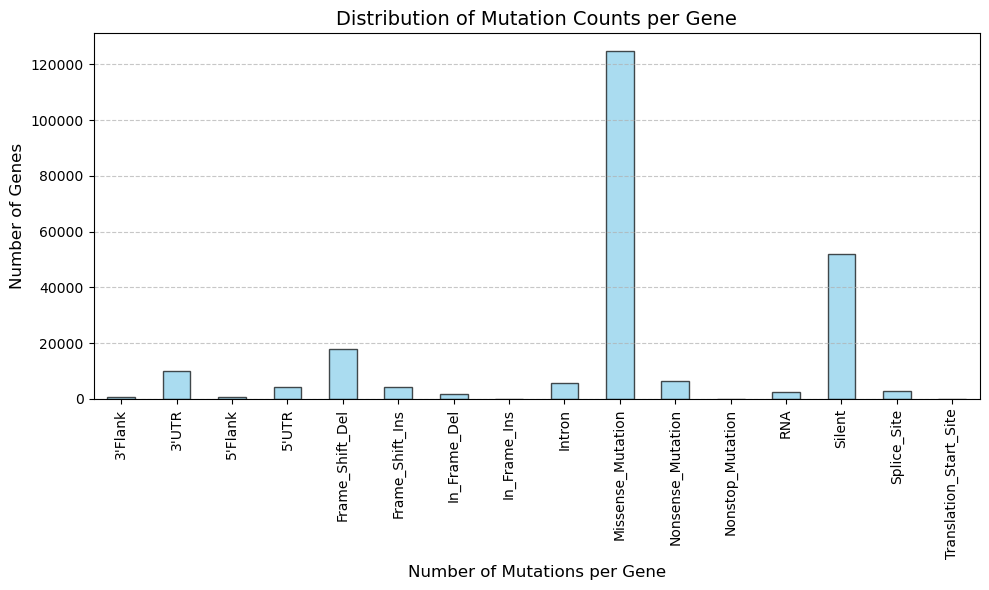

In [10]:
variant_classify = STAD_mutation.groupby("Variant_Classification").count().Center
plt.figure(figsize=(10,6))
variant_classify.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Number of Mutations per Gene', fontsize=12)
plt.ylabel('Number of Genes', fontsize=12)
plt.title('Distribution of Mutation Counts per Gene', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
STAD_mutation['mutation'] = STAD_mutation.Reference_Allele + ">" + STAD_mutation.Tumor_Validation_Allele2

In [12]:
STAD_mutation.groupby(["IMPACT"]).count()

,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,PolyPhen,DOMAINS,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS,COSMIC_status,mutation
IMPACT,,,,,,,,,,,,,,,,,,,,,
HIGH,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,...,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199
LOW,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,...,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887
MODERATE,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,...,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634
MODIFIER,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,...,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221


In [ ]:
import pandas as pd

STAD = pd.read_csv("Team_4_STAD/TCGA.STAD.mutations.txt", sep='\t')

# 2. define synonymous and nonsynonymous mutations
synonymous = {
    "Silent",
}
nonsynonymous = {
    "Missense_Mutation",
    "Nonsense_Mutation",
    "Frame_Shift_Del",
    "Frame_Shift_Ins",
    "Splice_Site",
    "Translation_Start_Site",
    # maybe other types we care about
}

# 3. mark if the mutation is nonsynonymous
STAD["is_nonsynonymous"] = STAD["Variant_Classification"].apply(
    lambda x: True if x in nonsynonymous
              else (False if x in synonymous else pd.NA)
)

# 4. drop the mutations that cannot be classified
STAD = STAD.dropna(subset=["is_nonsynonymous"])

# 5. summarize by gene: dN = number of nonsynonymous mutations; dS = number of synonymous mutations
dnds = (
    STAD
    .groupby("Hugo_Symbol")["is_nonsynonymous"]
    .agg(
        dN = "sum",                       # True 当作 1
        dS = lambda s: len(s) - s.sum()   # 总数 − 非同义 = 同义
    )
    .reset_index()
)

# 6. calculate the ratio
eps = 1e-6
dnds["dN/dS"] = dnds["dN"] / (dnds["dS"] + eps)

top20 = dnds.sort_values("dN/dS", ascending=False).head(20)
print(top20)


      Hugo_Symbol  dN  dS       dN/dS
7998         KRAS  39   0  39000000.0
8757       MAP2K7  36   0  36000000.0
17357       ZMYM4  26   0  26000000.0
12671        RBM6  26   0  26000000.0
14780       STAG1  25   0  25000000.0
6682        HLA-B  25   0  25000000.0
15429      THRAP3  22   0  22000000.0
12754        REST  22   0  22000000.0
2252        CASP8  22   0  22000000.0
12164        PRTG  22   0  22000000.0
12848        RHOA  22   0  22000000.0
8308        LHCGR  21   0  21000000.0
17281      ZFAND4  20   0  20000000.0
11629       PLOD2  20   0  20000000.0
15485        TJP2  20   0  20000000.0
17711      ZNF658  20   0  20000000.0
7302         IL7R  20   0  20000000.0
4820         ESF1  20   0  20000000.0
6237        GPSM3  19   0  19000000.0
3871          DCT  19   0  19000000.0


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

simple = pd.read_csv("dnds_simple.tsv", sep="\t")              # 简单 dN/dS
dndscv = pd.read_csv("dndscv_all_genes.tsv", sep="\t")        # dndscv 全基因

top20_simple = set(simple.nlargest(20, "dN/dS")["Hugo_Symbol"])
sig_dndscv   = set(dndscv.query("qglobal_cv < 0.05")["gene_name"])

plt.figure(figsize=(5,5))
venn2([top20_simple, sig_dndscv], ("Top20 dN/dS", "dNdScv sig"))
plt.title("Overlap between Top20 dN/dS and dNdScv hits")
plt.show()


['gene_name', 'n_syn', 'n_mis', 'n_non', 'n_spl', 'n_ind', 'wmis_cv', 'wnon_cv', 'wspl_cv', 'wind_cv', 'pmis_cv', 'ptrunc_cv', 'pallsubs_cv', 'pind_cv', 'qmis_cv', 'qtrunc_cv', 'qallsubs_cv', 'qind_cv', 'pglobal_cv', 'qglobal_cv']


In [20]:
import pandas as pd

simple = pd.read_csv("dnds_simple.tsv", sep="\t")          # 你的简单 dN/dS
dndscv = pd.read_csv("dndscv_all_genes.tsv", sep="\t")    # dndscv 输出

print(dndscv.columns.tolist())

['gene_name', 'n_syn', 'n_mis', 'n_non', 'n_spl', 'n_ind', 'wmis_cv', 'wnon_cv', 'wspl_cv', 'wind_cv', 'pmis_cv', 'ptrunc_cv', 'pallsubs_cv', 'pind_cv', 'qmis_cv', 'qtrunc_cv', 'qallsubs_cv', 'qind_cv', 'pglobal_cv', 'qglobal_cv']


In [22]:
# 3. take the top 20 genes with the highest dN/dS
top20 = simple.nlargest(20, "dN/dS")[["Hugo_Symbol","dN","dS","dN/dS"]].copy()
top20 = top20.rename(columns={"Hugo_Symbol":"gene"})

# 4. take qglobal_cv from dndscv table
dnd       = dndscv[["gene_name","qglobal_cv"]].copy()
dnd       = dnd.rename(columns={"gene_name":"gene"})

# 5. merge: only keep the intersection of the two tables
merged = pd.merge(top20, dnd, on="gene", how="inner")

print(merged)
merged.to_csv("candidates_intersection.tsv", sep="\t", index=False)

       gene  dN  dS      dN/dS  qglobal_cv
0    ACVR2A  52   1  51.999948    0.542491
1      PGM5  34   1  33.999966    0.006034
2     RASA1  33   1  32.999967    0.013531
3    GRIN3A  29   1  28.999971    1.000000
4      SMC2  25   1  24.999975    1.000000
5     RNF43  48   2  23.999988    0.000631
6     KIF14  24   1  23.999976    1.000000
7   NUP210L  24   1  23.999976    1.000000
8      NPAT  24   1  23.999976    1.000000
9     NUAK1  24   1  23.999976    1.000000
10    ITGB8  23   1  22.999977    1.000000
11     UACA  23   1  22.999977    1.000000
12   RASAL2  22   1  21.999978    1.000000
13   OR4C16  21   1  20.999979    1.000000
14    NOMO1  21   1  20.999979    1.000000
15    RGPD3  21   1  20.999979    1.000000
16    MANEA  21   1  20.999979    1.000000
17  ZFYVE20  21   1  20.999979    1.000000
18  RAPGEF5  20   1  19.999980    1.000000
